In [2]:
import typing
import math
import random
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pi = 3.14159265358979323846

## Approximating Pi based on method proposed in "Field Theory Expansions of String Theory Amplitudes" by Arnab Saha and Aninda Sinha at IISc.

Given <br>

$$
\frac{\Gamma(-s_1) \Gamma(-s_2)}{\Gamma(1 - s_1 - s_2)}
= \sum_{n=0}^{\infty} \frac{1}{n!}
\left( \frac{1}{s_1 - n} + \frac{1}{s_2 - n} + \frac{1}{\lambda + n} \right)
\left(1 - λ + \frac{(s_1 + \lambda)(s_2 + \lambda)}{\lambda + n} \right)_{(n-1)}
$$

for $$s_1 = s_2 = -1/2$$

$$ \pi = 4 +  \sum_{n=0}^{\infty} \left(\frac{1}{n+4} - \frac{4}{2n + 1} \right)\left(\frac{(2n+1)^2}{4(n+λ)} -n\right)_{(n-1)} $$

Further,

$$ \lim_{λ\to\infty} \left( \frac{ 4 +  \sum_{n=0}^{\infty} \left(\frac{1}{n+4} - \frac{4}{2n + 1} \right)\left(\frac{(2n+1)^2}{4(n+λ)} -n\right)_{(n-1)}}{4} \right)  $$

translates to **Madhava Series for approximation of pi**.


Reference: [Saha et al. "Field Theory Expansions of String Theory Amplitudes"](https://journals.aps.org/prl/pdf/10.1103/PhysRevLett.132.221601)



In [16]:
def calculate_pi_approximation(n_terms, lamda):
  """
  Calculates an approximation of pi using the given equation.

  Args:
    n_terms: The number of terms to include in the series.
    lamda: The value of lambda.

  Returns:
    The approximated value of pi.
  """
  pi_approximation = 4
  for n in range(n_terms):
    term1 = (1 / (n + 4)) - (4 / (2 * n + 1))
    term2 = ((2 * n + 1)**2) / (4 * (n + lamda)) - n

    # Pochhammer symbol (falling factorial) calculation:
    # (x)_n = x(x-1)(x-2)...(x-n+1)
    # For n = 0, (x)_0 = 1
    pochhammer_term = 1
    if n > 0:
        for i in range(n):
            pochhammer_term *= (term2 - i)

    pi_approximation += term1 * pochhammer_term
  return pi_approximation

In [17]:
n_terms_range = range(1, 51)  # Calculate for 1 to 50 terms
lamda_value = 50  # Set a value for lambda

approximations = []
errors = []

for n_terms in n_terms_range:
  pi_approx = calculate_pi_approximation(n_terms, lamda_value)
  approximations.append(pi_approx)
  errors.append(abs(math.pi - pi_approx))

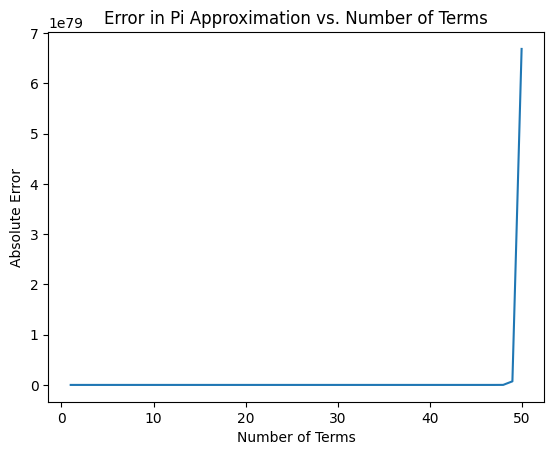

In [18]:
plt.plot(n_terms_range, errors)
plt.title("Error in Pi Approximation vs. Number of Terms")
plt.xlabel("Number of Terms")
plt.ylabel("Absolute Error")
plt.show()

In [19]:
print(f"lowest error: {min(errors)}")

lowest error: 1.8082593202564599


In [ ]:
# Define a range for n and lambda to search
n_terms_range = range(1, 1001)  # Wider range for n
lamda_range = range(1, 1001)   # Wider range for lambda

lowest_error = float('inf')
best_n = 0
best_lamda = 0

for n_terms in n_terms_range:
    for lamda in lamda_range:
        pi_approx = calculate_pi_approximation(n_terms, lamda)
        error = abs(math.pi - pi_approx)

        # Check if current error is lower than the lowest found so far
        if error < lowest_error:
            lowest_error = error
            best_n = n_terms
            best_lamda = lamda

            # If error is small enough to approximate to 20 decimal places, break
            if error < 1e-20:
                break
    else:  # Continue if the inner loop wasn't broken
        continue
    break  # Break the outer loop if the inner loop was broken

print(f"Lowest error: {lowest_error}")
print(f"Best n: {best_n}")
print(f"Best lambda: {best_lamda}")